# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string                                               #A collection of string constants

In [2]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (22,12)
plt.rcParams['font.size'] = 12

In [3]:
from lightgbm import LGBMClassifier                         #Construct a gradient boosting model
from xgboost import XGBClassifier                           #Gradient boosted decision trees
from sklearn import metrics                                 #performance metrics
from sklearn.model_selection import train_test_split        # spliting data

In [4]:
# Data load

data = pd.read_csv('data_all.csv',nrows=10000)
data.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# It can be downgraded the float64 to uint8
data.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, e to 784
dtypes: float64(785)
memory usage: 59.9 MB


In [6]:
# Reducing data memory

for col in data.columns:
    data[col]=pd.to_numeric(data[col],downcast='unsigned')

In [7]:
data.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, e to 784
dtypes: uint8(785)
memory usage: 7.5 MB


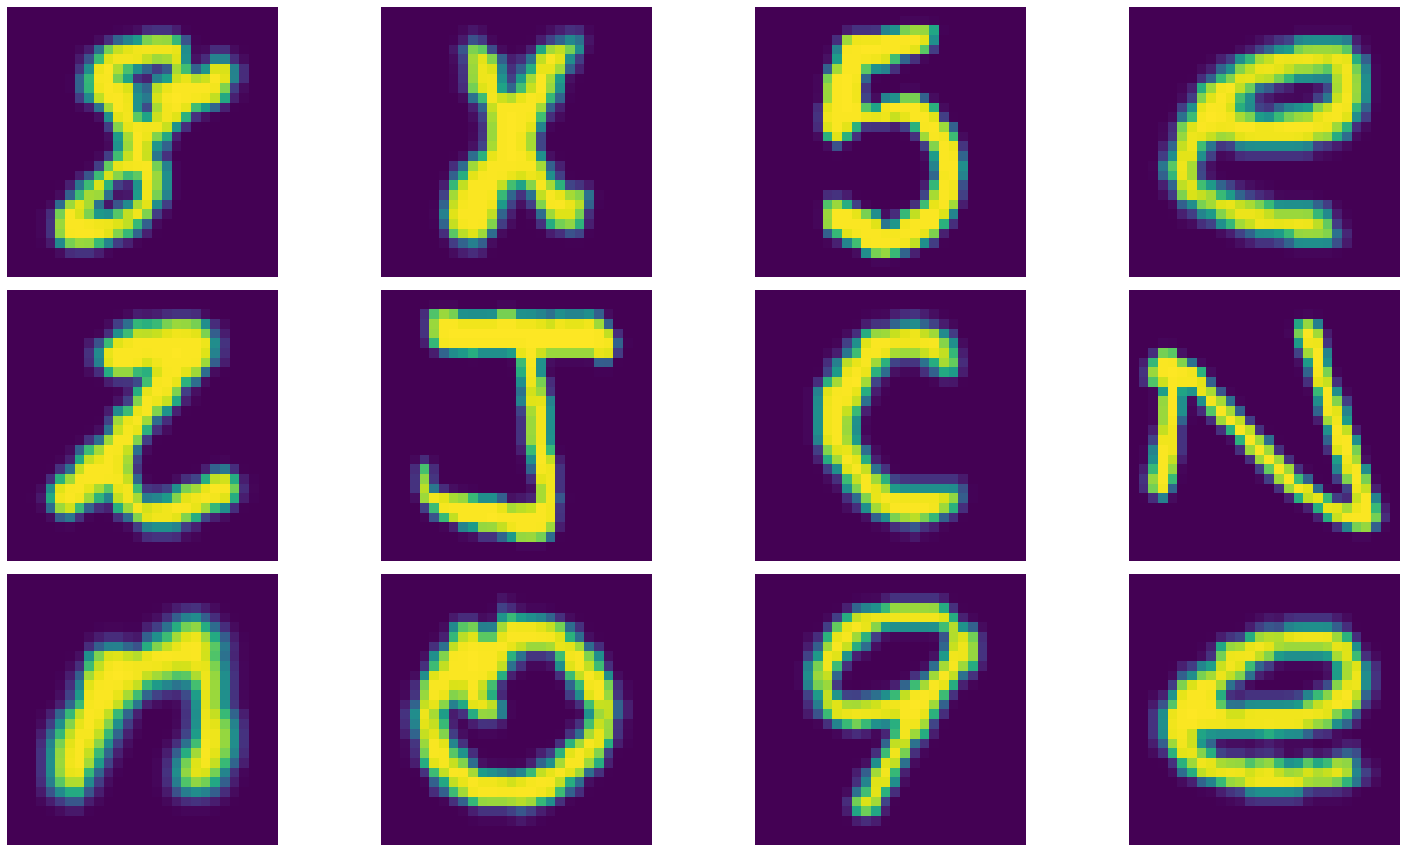

In [8]:
# Exploring the images from the database

fig, ax = plt.subplots(3,4,sharex=True,sharey=True)
for i in range(4):
    ax[0,i].imshow(data.iloc[np.random.choice(9999), 1:].values.reshape(28,28))
    ax[0,i].axis('off')
    ax[1,i].imshow(data.iloc[np.random.choice(9999), 1:].values.reshape(28,28))
    ax[1,i].axis('off')
    ax[2,i].imshow(data.iloc[np.random.choice(9999), 1:].values.reshape(28,28))
    ax[2,i].axis('off')
plt.tight_layout()

In [9]:
# Making a complete dictionary using string library

string.digits             #output: '0123456789'
string.ascii_uppercase    #output: 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
string.ascii_lowercase    #output: 'abcdefghijklmnopqrstuvwxyz'

labels = string.digits + string.ascii_uppercase +string.ascii_lowercase
labels_dict = {n:l for n,l in enumerate(labels)}

In [10]:
# Definign X y

X = data.iloc[:,1:]/255
y = data.e

In [11]:
# Splitting the data between train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

In [12]:
# Inicializing the classifier model

light_gbm = LGBMClassifier()

In [13]:
# Training the model

light_gbm.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [14]:
# Predicting for the train and test data

y_hat_train = light_gbm.predict(X_train)
y_hat_test =  light_gbm.predict(X_test)

In [15]:
#Accuracy score

print(f'Accuracy score (trained data):\t{metrics.accuracy_score(y_train, y_hat_train)}\nAccuracy score (tested data):\t{metrics.accuracy_score(y_test, y_hat_test)}')

# :( why??

Accuracy score (trained data):	1.0
Accuracy score (tested data):	0.6895


In [34]:
def confusion_matrix(y_trn, y_h_trn, y_tst, y_h_tst,labels,annot=False,fmt='g'):
    
    #confusion matrix
    fig, ax = plt.subplots(1,2)
    
    #creating confusion matrix
    gbm_train = metrics.confusion_matrix(y_trn, y_h_trn)
    gbm_test = metrics.confusion_matrix(y_tst, y_h_tst)
    
    #Normalization
    gbm_train = gbm_train / gbm_train.sum(axis=0)
    gbm_test = gbm_test / gbm_test.sum(axis=0)
    
    sns.heatmap(gbm_train,cbar=False,square=True,annot=annot,cmap='Blues',fmt='g',yticklabels=labels,xticklabels=labels,ax=ax[0])
    ax[0].set_ylabel('True label')
    ax[0].set_xlabel('Predicted label')
    ax[0].set_title('Trained data confusion matrix')
    
    sns.heatmap(gbm_test,cbar=False,square=True,annot=annot,cmap='Blues',fmt=fmt,yticklabels=labels,xticklabels=labels,ax=ax[1])
    ax[1].set_ylabel('True label')
    ax[1].set_xlabel('Predicted label')
    ax[1].set_title('Tested data confusion matrix')
    
    plt.tight_layout()

c:\users\paola\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


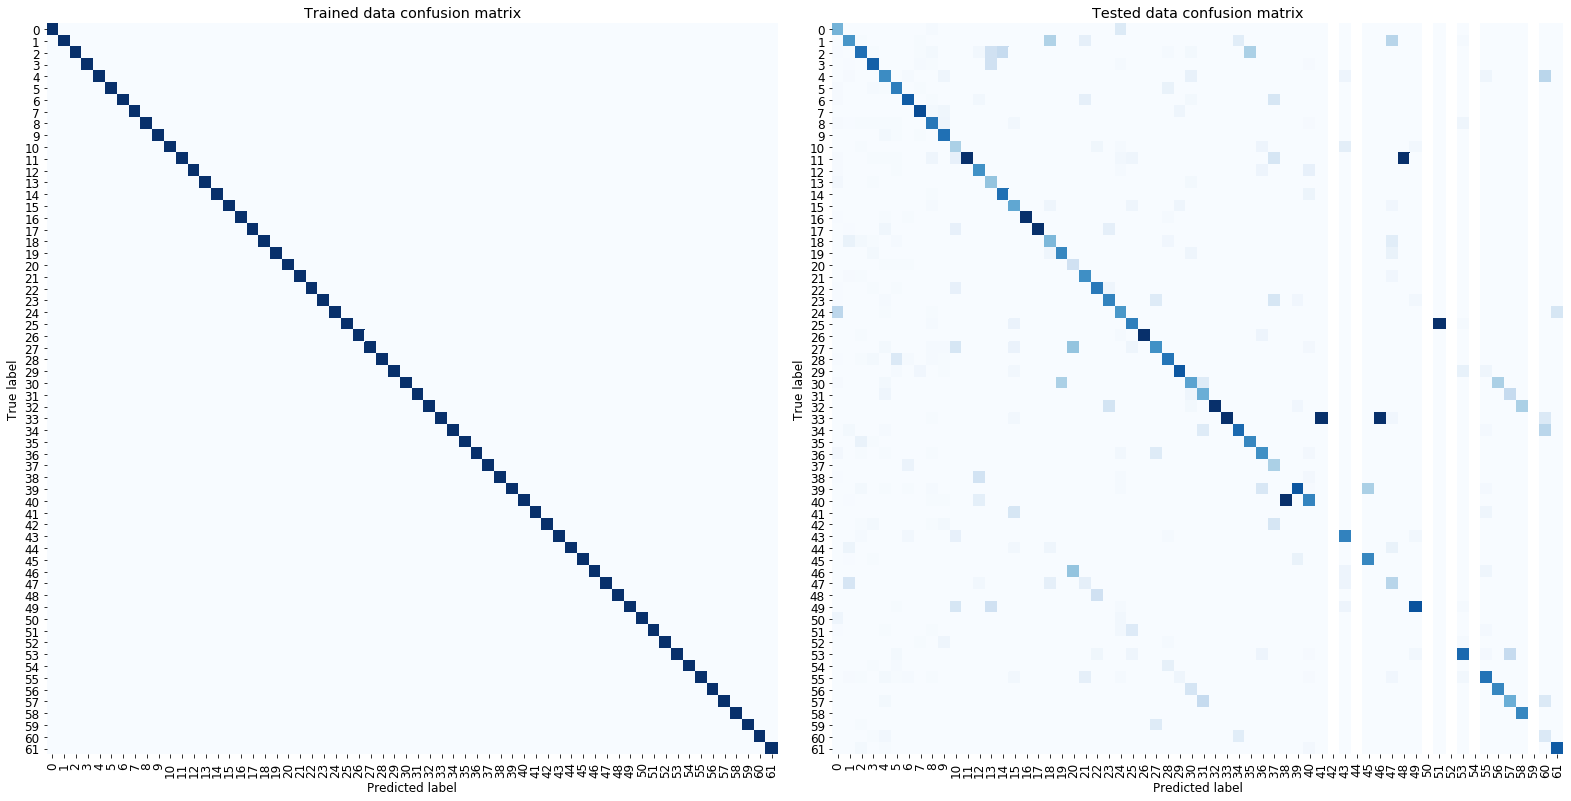

In [35]:
confusion_matrix(y_train,y_hat_train,y_test,y_hat_test,labels_dict);

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [28]:
# Uppercase model

#Spliting data
y_train_upper, X_train_upper = y_train[(y_train >= 10)&(y_train >= 35)], X_train[(y_train >= 10)&(y_train >= 35)]
y_test_upper, X_test_upper =  y_test[(y_test >= 10)&(y_test >= 35)], X_test[(y_test >= 10)&(y_test >= 35)]


#Training the model
light_gbm.fit(X_train_upper, y_train_upper)

#Making predictions
y_hat_train_upper = light_gbm.predict(X_train_upper)
y_hat_test_upper = light_gbm.predict(X_test_upper)

#Accuracy
print(f'Accuracy score (trained data):\t{metrics.accuracy_score(y_train_upper, y_hat_train_upper)}\nAccuracy score (tested data):\t{metrics.accuracy_score(y_test_upper, y_hat_test_upper)}')

Accuracy score (trained data):	1.0
Accuracy score (tested data):	0.7341772151898734


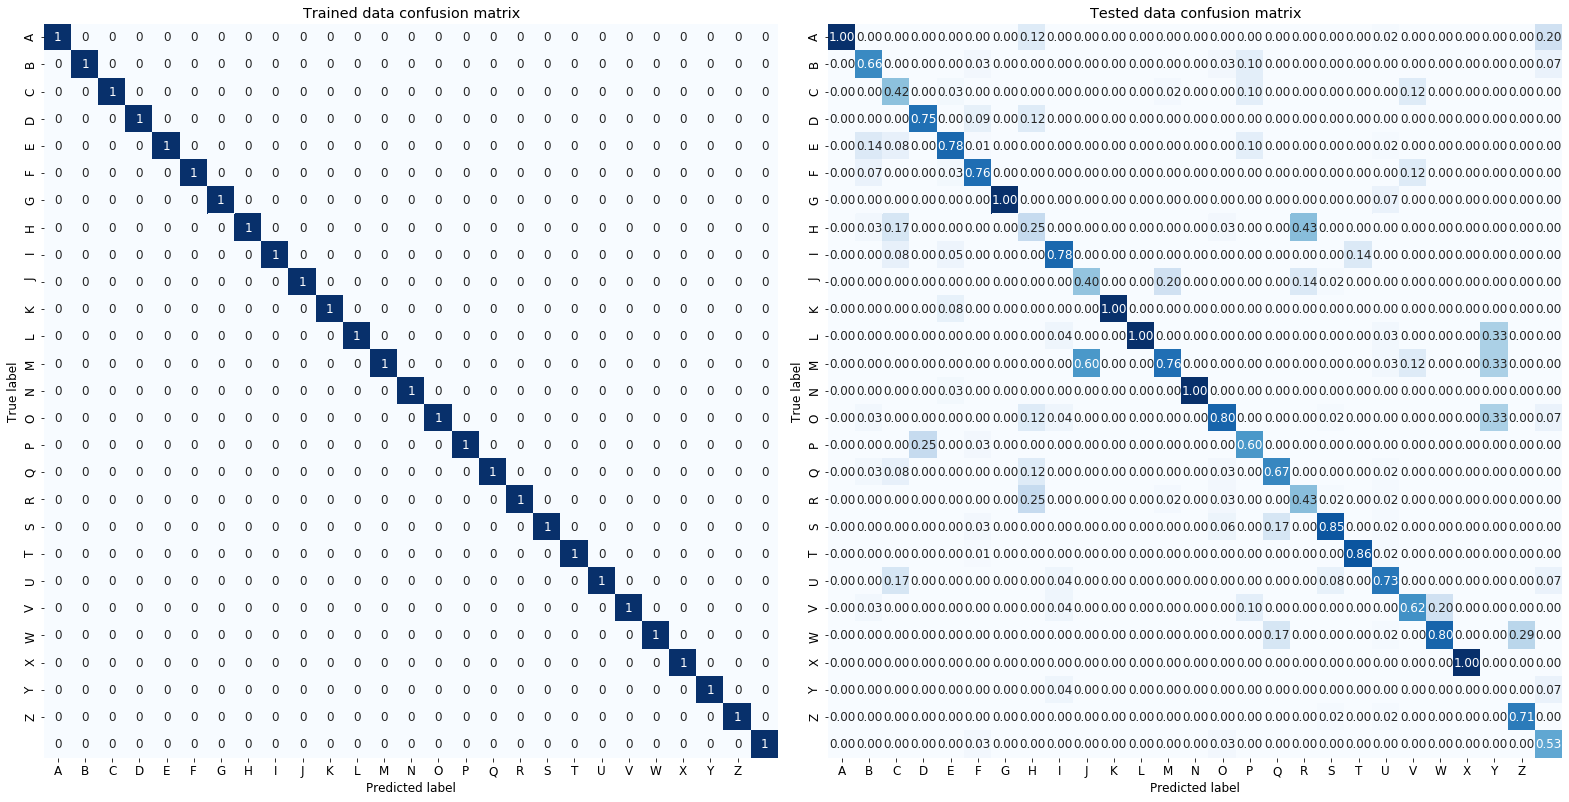

In [37]:
# Confusion Matrix
confusion_matrix(y_train_upper, y_hat_train_upper, y_test_upper, y_hat_test_upper, string.ascii_uppercase, annot=True, fmt='.2f');

* Try to do the same thing with lowercases.

In [30]:
# Lowercase model

#Spliting data

y_train_lower, X_train_lower = y_train[(y_train >= 36)], X_train[(y_train >= 36)]
y_test_lower, X_test_lower =  y_test[(y_test >= 36)], X_test[(y_test >= 36)]

#Training the model
light_gbm.fit(X_train_lower, y_train_lower)

#Making predictions
y_hat_train_lower = light_gbm.predict(X_train_lower)
y_hat_test_lower = light_gbm.predict(X_test_lower)

#Accuracy
print(f'Accuracy score (trained data):\t{metrics.accuracy_score(y_train_lower, y_hat_train_lower)}\nAccuracy score (tested data):\t{metrics.accuracy_score(y_test_lower, y_hat_test_lower)}')

Accuracy score (trained data):	1.0
Accuracy score (tested data):	0.7424242424242424


c:\users\paola\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


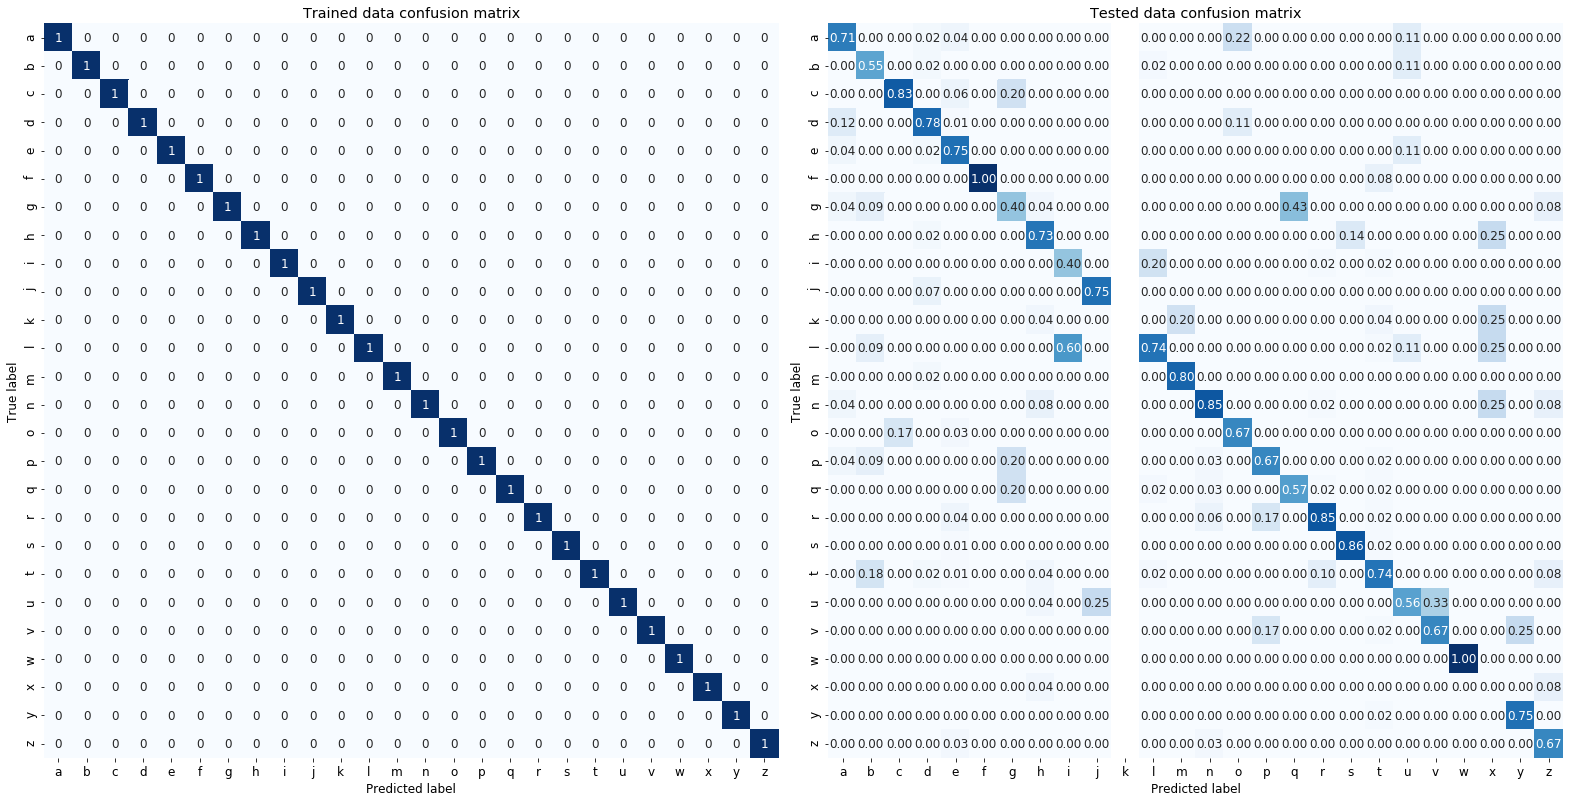

In [38]:
# Confusion Matrix

confusion_matrix(y_train_lower, y_hat_train_lower, y_test_lower, y_hat_test_lower, string.ascii_lowercase, annot=True, fmt='.2f');

* Try to do the same thing with numbers.

In [32]:
# Digits model

#Spliting data
y_train_dig, X_train_dig = y_train[(y_train <= 9)], X_train[(y_train <= 9)]
y_test_dig, X_test_dig =  y_test[(y_test <= 9)], X_test[(y_test <= 9)]


#Training the model
light_gbm.fit(X_train_dig, y_train_dig)

#Making predictions
y_hat_train_dig = light_gbm.predict(X_train_dig)
y_hat_test_dig = light_gbm.predict(X_test_dig)

#Accuracy
print(f'Accuracy score (trained data):\t{metrics.accuracy_score(y_train_lower, y_hat_train_lower)}\nAccuracy score (tested data):\t{metrics.accuracy_score(y_test_lower, y_hat_test_lower)}')

Accuracy score (trained data):	1.0
Accuracy score (tested data):	0.7424242424242424


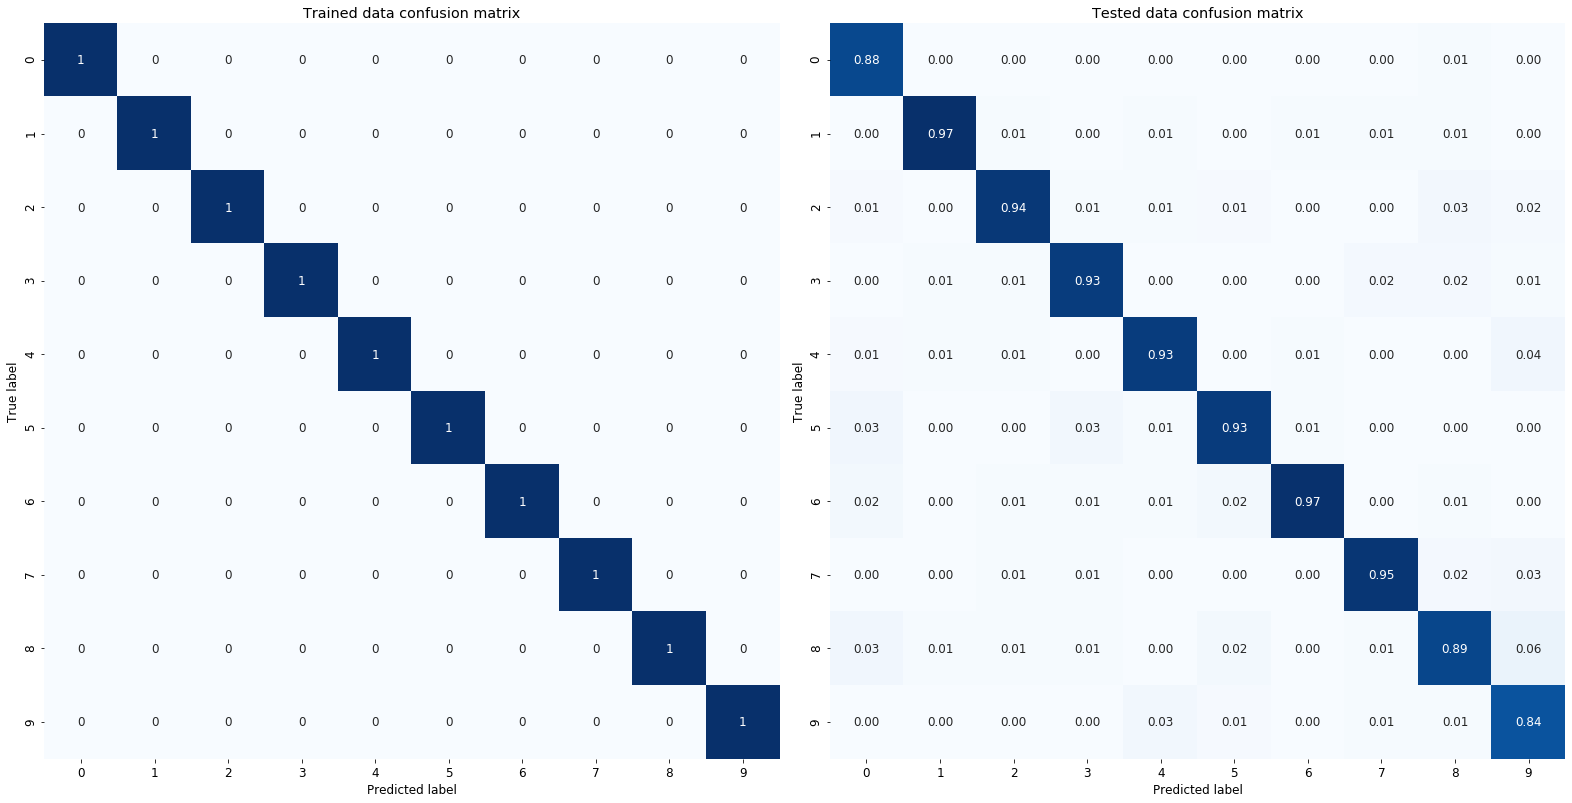

In [39]:
# Confusion Matrix
confusion_matrix(y_train_dig, y_hat_train_dig, y_test_dig, y_hat_test_dig, string.digits, annot=True, fmt='.2f')